In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = 'ML_QUESTION_Sheet1_final.csv'
df = pd.read_csv(PATH)

In [3]:
df.head()

,question,marks
0,Explain the Closure and Decision properties of...,2
1,Explain limitations of Finite Automala,2
2,List the limitations of finite automata,2
3,Define Concurrent Grammar,2
4,Define Context free Grammar & give its Applica...,2


In [4]:
df.tail()

,question,marks
607,Derive an expression for displacement due to g...,8
608,Explain clearly what is meant by side equation...,8
609,What is spherical excess? What are the methods...,8
610,Explain following for Testing Process. a) Misc...,10
611,a) What is Test Automation. b) Different terms...,10


In [5]:
df.size

1224

In [6]:
df.shape

(612, 2)

In [7]:
df.columns

Index(['question', 'marks'], dtype='object')

In [9]:
df['marks'].unique()

array([ 2,  3,  4,  5,  6,  7,  8, 10], dtype=int64)

In [10]:
df.dtypes

question    object
marks        int64
dtype: object

In [11]:
df['marks'].value_counts()

5     162
6     150
4     113
8     108
7      44
3      27
2       6
10      2
Name: marks, dtype: int64

<AxesSubplot: >

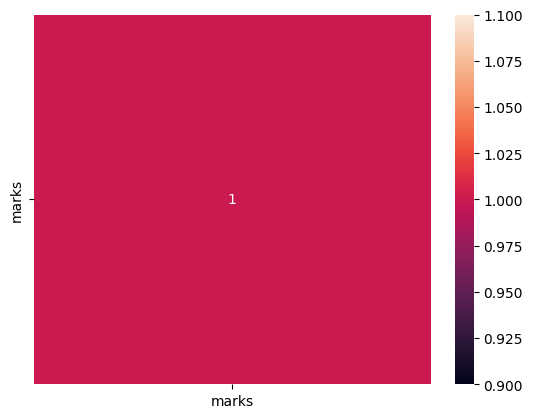

In [12]:
sns.heatmap(df.corr(),annot=True)

In [14]:
features = df[['question']]
target = df['marks']
labels = df['marks']

In [15]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [16]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Guassian Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

ValueError: could not convert string to float: 'Explain with example product quality metric.'

In [18]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

# Saving trained Guassian Naive Bayes model

In [19]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Making a prediction

In [21]:
data = np.array([[73,35,38,24.88921174,81.97927117,5.005306977,185.9461429]])
prediction = NaiveBayes.predict(data)
print(prediction)

['rice']
